In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as po
import numpy as np
import pickle

In [2]:
df = po.read_pickle('../data/DataAnalysis_v2/eDTWBI_Imputed_Data.pkl')
df

,consumption
time,
2017-01-01 00:00:00,126661.288667
2017-01-01 00:15:00,125975.630600
2017-01-01 00:30:00,131628.821400
2017-01-01 00:45:00,133741.109667
2017-01-01 01:00:00,149806.386667
...,...
2019-11-04 22:45:00,103932.504002
2019-11-04 23:00:00,102064.379714
2019-11-04 23:15:00,100378.796042


In [3]:
with open('../missing_value_analysis/edtwbi_imputed.pkl', 'rb') as f:
    imp = pickle.load(f)

In [4]:
df['consumption_2'] = imp[:-1]

In [5]:
df['consumption_2'].value_counts()

0.000000         262
50142.870214       5
50532.499300       4
52397.321000       4
51151.055367       4
                ... 
84704.583000       1
121038.419967      1
79236.225625       1
119578.624733      1
198141.918681      1
Name: consumption_2, Length: 95238, dtype: int64

In [6]:
df['consumption_2'] = df['consumption_2'].replace(to_replace=0, value=np.nan)#.value_counts()

In [7]:
df['consumption_2'] = df['consumption_2'].fillna(method='ffill')

In [8]:
df['consumption_2'].isnull().sum()

0

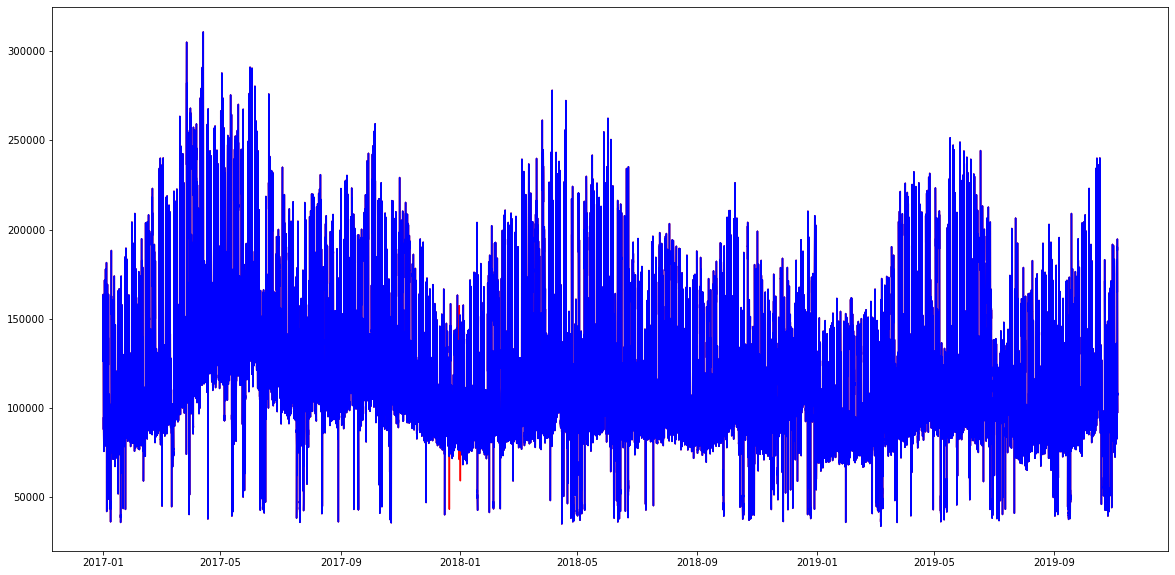

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(df['consumption_2'].fillna(method='ffill'), color='red')
plt.plot(df['consumption'], color='blue')

In [10]:
df['consumption'] = df['consumption_2']

In [11]:
df = df.drop('consumption_2', axis=1)

In [12]:
df

,consumption
time,
2017-01-01 00:00:00,126661.288667
2017-01-01 00:15:00,125975.630600
2017-01-01 00:30:00,131628.821400
2017-01-01 00:45:00,133741.109667
2017-01-01 01:00:00,149806.386667
...,...
2019-11-04 22:45:00,103932.504002
2019-11-04 23:00:00,102064.379714
2019-11-04 23:15:00,100378.796042


In [13]:
df.to_csv('univariate.csv', index=False)

In [14]:
df['Date'] = df.index.date
df['Time'] = df.index.time

In [15]:
df

,consumption,Date,Time
time,,,
2017-01-01 00:00:00,126661.288667,2017-01-01,00:00:00
2017-01-01 00:15:00,125975.630600,2017-01-01,00:15:00
2017-01-01 00:30:00,131628.821400,2017-01-01,00:30:00
2017-01-01 00:45:00,133741.109667,2017-01-01,00:45:00
2017-01-01 01:00:00,149806.386667,2017-01-01,01:00:00
...,...,...,...
2019-11-04 22:45:00,103932.504002,2019-11-04,22:45:00
2019-11-04 23:00:00,102064.379714,2019-11-04,23:00:00
2019-11-04 23:15:00,100378.796042,2019-11-04,23:15:00


In [16]:
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)

In [17]:
df['DayOfYear'] = df['Date'].apply(lambda x: x.timetuple().tm_yday)
df['DayOfWeek'] = df['Date'].apply(lambda x: x.weekday())
df['DayType']   = df['DayOfWeek'].apply(lambda x: 1 if x < 5 else 0)

In [18]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)
df['Minute'] = df['Time'].apply(lambda x: x.minute)

In [19]:
seasons = {'Winter': [10, 11, 12, 1, 2], 'Summer': [3, 4, 5, 6], 'Monsoon': [7, 8, 9]}

In [20]:
m2s = [-1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0]

In [21]:
len(m2s)

13

In [22]:
df['Season'] = df['Month'].apply(lambda x: m2s[x])

In [23]:
df['Year'] = df['Date'].apply(lambda x: x.year)

In [24]:
df = df.drop(['Time', 'Date'], axis=1)

In [25]:
df

,consumption,Year,Month,DayOfYear,DayOfWeek,DayType,Hour,Minute,Season
time,,,,,,,,,
2017-01-01 00:00:00,126661.288667,2017,1,1,6,0,0,0,0
2017-01-01 00:15:00,125975.630600,2017,1,1,6,0,0,15,0
2017-01-01 00:30:00,131628.821400,2017,1,1,6,0,0,30,0
2017-01-01 00:45:00,133741.109667,2017,1,1,6,0,0,45,0
2017-01-01 01:00:00,149806.386667,2017,1,1,6,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2019-11-04 22:45:00,103932.504002,2019,11,308,0,1,22,45,0
2019-11-04 23:00:00,102064.379714,2019,11,308,0,1,23,0,0
2019-11-04 23:15:00,100378.796042,2019,11,308,0,1,23,15,0


In [26]:
df.to_csv('multivariate.csv', index=False)

In [64]:
df = po.read_csv('multivariate.csv')
df

,consumption,Year,Month,DayOfYear,DayOfWeek,DayType,Hour,Minute,Season
0,126661.288667,2017,1,1,6,0,0,0,0
1,125975.630600,2017,1,1,6,0,0,15,0
2,131628.821400,2017,1,1,6,0,0,30,0
3,133741.109667,2017,1,1,6,0,0,45,0
4,149806.386667,2017,1,1,6,0,1,0,0
...,...,...,...,...,...,...,...,...,...
99643,103932.504002,2019,11,308,0,1,22,45,0
99644,102064.379714,2019,11,308,0,1,23,0,0
99645,100378.796042,2019,11,308,0,1,23,15,0
99646,98593.460339,2019,11,308,0,1,23,30,0


In [65]:
def make_windows(data, train_seq_len = 4*24*7, val_seq_len = 4*24):
    X = np.zeros((len(data) - val_seq_len + 1 - train_seq_len, train_seq_len, len(data.columns)))
    y = np.zeros((len(data) - val_seq_len + 1 - train_seq_len, val_seq_len, 1))

    for i in tqdm(range(train_seq_len, len(data) - val_seq_len + 1)):        
        X[i-train_seq_len, :, :] = data.values[i - train_seq_len: i]
        y[i-train_seq_len, :, :] = data['consumption'].values[i: i + val_seq_len].reshape(-1, 1)
        
    return X, y

In [66]:
X, y = make_windows(df)

100%|██████████| 98881/98881 [01:08<00:00, 1443.11it/s]


In [67]:
X.shape

(98881, 672, 9)

In [68]:
y.shape

(98881, 96, 1)

In [3]:
train_seq_len = 4*24*7
val_seq_len = 4*24
data = df

In [25]:
X = np.zeros((len(data) - val_seq_len + 1 - train_seq_len, train_seq_len, len(data.columns)))
y = np.zeros((len(data) - val_seq_len + 1 - train_seq_len, val_seq_len, 1))

In [40]:
for i in tqdm(range(train_seq_len, len(data) - val_seq_len + 1)):        
    X[i-train_seq_len, :, :] = data.values[i - train_seq_len: i]
    y[i-train_seq_len, :, :] = data['consumption'].values[i: i + val_seq_len].reshape(-1, 1)

100%|██████████| 98881/98881 [01:14<00:00, 1325.13it/s]


In [57]:
df.iloc[train_seq_len-10:train_seq_len+10]

,consumption,Year,Month,DayOfYear,DayOfWeek,DayType,Hour,Minute,Season
662,85175.797667,2017,1,7,5,0,21,30,0
663,83750.254000,2017,1,7,5,0,21,45,0
664,84045.454200,2017,1,7,5,0,22,0,0
665,81897.511733,2017,1,7,5,0,22,15,0
666,80842.488400,2017,1,7,5,0,22,30,0
667,82252.116267,2017,1,7,5,0,22,45,0
668,81108.183400,2017,1,7,5,0,23,0,0
669,82448.346733,2017,1,7,5,0,23,15,0
670,83156.285941,2017,1,7,5,0,23,30,0
671,82049.840000,2017,1,7,5,0,23,45,0


In [59]:
X[0, :, 6][-10:]

array([21., 21., 22., 22., 22., 22., 23., 23., 23., 23.])

In [58]:
X[0, :, 1][-10:]

array([2017., 2017., 2017., 2017., 2017., 2017., 2017., 2017., 2017.,
       2017.])

In [53]:
y[0, :, 0][:10]

array([81958.56642857, 81703.568     , 81155.45826667, 77713.64473333,
       75768.32864286, 50288.6135    , 51770.2675    , 51050.95846667,
       51088.09046667, 53280.42606667])

In [56]:
y[0, :, 0][:10]

array([81958.56642857, 81703.568     , 81155.45826667, 77713.64473333,
       75768.32864286, 50288.6135    , 51770.2675    , 51050.95846667,
       51088.09046667, 53280.42606667])